In [7]:
text = '''아름답지만 다소 복잡하기도한 한국어는
전세계에서 13번째로 많이 사용되는 언어입니다.'''

In [8]:
from konlpy.tag import Hannanum

In [9]:
han = Hannanum()

In [10]:
han.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡하기도한', 'ncn')], [('복잡하기도한', 'nqq')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

In [16]:
han.morphs(text)

['아름답',
 '지만',
 '다소',
 '복잡하기도한',
 '한국어',
 '는',
 '전세계',
 '에서',
 '13번',
 '째',
 '로',
 '많',
 '이',
 '사용',
 '되',
 '는',
 '언어',
 '이',
 'ㅂ니다',
 '.']

In [13]:
han.nouns(text)

['복잡하기도한', '한국어', '전세계', '13번', '사용', '언어']

In [15]:
han.pos(text, ntags=22)

[('아름답', 'PA'),
 ('지만', 'EC'),
 ('다소', 'MA'),
 ('복잡하기도한', 'NC'),
 ('한국어', 'NC'),
 ('는', 'JX'),
 ('전세계', 'NC'),
 ('에서', 'JC'),
 ('13', 'NN'),
 ('번', 'NB'),
 ('째', 'XS'),
 ('로', 'JC'),
 ('많', 'PA'),
 ('이', 'XS'),
 ('사용', 'NC'),
 ('되', 'XS'),
 ('는', 'ET'),
 ('언어', 'NC'),
 ('이', 'JP'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF')]

In [36]:
del han

##### news자료로 크롤링해서 konlpy사용하기

In [2]:
import requests
import time
jtbc_economy = requests.get('https://fs.jtbc.joins.com/RSS/newsflash.xml')
from bs4 import BeautifulSoup
economy_news_list = BeautifulSoup(jtbc_economy.content, 'xml')
link_list = economy_news_list.select('item > link')

In [3]:
%%time
news_data = []
for link in link_list:
    news=requests.get(link.text)
    news_soup = BeautifulSoup(news.content, 'html.parser')
    news_content = news_soup.select_one('#articlebody> .article_content')
    news_data.append(news_content.text)
news_data
import pandas as pd
news_df = pd.DataFrame(data=news_data, columns=['news'])
news_df.head()

Wall time: 2.5 s


,news
0,\n'한 사람만' 안은진X김경남의 애틋한 '손' 서사가 시청자들의 마음을 적시고 있...
1,"\n· ""모두 제 책임…가족과 관련 심려끼쳐 죄송""· ""원칙과 잣대, 제 주변에도 ..."
2,\n'기상청 사람들: 사내연애 잔혹사 편'이 새해를 맞아 연애 세포를 열일하게 만드...
3,\n어디서도 볼 수 없었던 '사이다 토론'이 펼쳐진다.오늘(5일) 밤 9시 첫 방송...
4,\n'한 사람만'의 미스터리를 관통하는 채송화 살인사건의 진범이 안은진이 아니었다는...


In [21]:
from konlpy.tag import Hannanum
han_news=Hannanum()

In [23]:
news_df['news'][0]

'\n\'한 사람만\' 안은진X김경남의 애틋한 \'손\' 서사가 시청자들의 마음을 적시고 있다.JTBC 월화드라마 \'한 사람만\'(극본 문정민 연출 오현종 제작 키이스트, JTBC스튜디오)에서 \'손\'으로 이어진 표인숙(안은진)과 민우천(김경남)의 애틋한 구원서사가 뭉근한 여운을 선사하고 있다. 인숙과 우천이 처음으로 손을 맞잡은 날은 오래 전으로 거슬러 올라간다. 어린 우천이 처음으로 가족 외식을 했던 그 날이었다. 저녁을 맛있게 먹고 집에 오는 길에 차에서 잠이 들었는데, 눈을 떠보니 차 안은 연기로 가득했고, 이상한 냄새가 코를 찔렀다. 우천의 아빠가 가족 동반 자살을 시도한 것. 숨이 막혀 창문을 두드리고, 또 두드리다 \'이렇게 죽는구나\' 싶어 포기할 때쯤, 인숙이 나타났다. 어린 우천보다 더 작았던 그때의 인숙은 제 주먹보다 큰 돌덩이를 들어 창문을 깼다. 그리곤 우천의 늘어진 손을 꼭 잡으며 따스한 온기를 전했다.시간이 지나 우천은 자신을 구해준 어린 아이를 다시 만났다. 그것도 살인청부업자가 된 그의 일터에서였다. 그런데 운명적으로 다시 만난 인숙은 분명 화가 난 얼굴인데 슬퍼 보였다. 그녀만 생각하면 가슴이 물컹거렸다. 그래서 호스피스 \'아침의 빛\'을 찾았고, 그 감정은 점점 짙어 졌다. 사람을 죽인 과거를 후회하고 점점 더 좋은 사람이 되고 싶었다. 서로를 그렇게 만드는 그것, 바로 사랑이었다.손을 내밀 때마다 고스란히 상처로 돌아와 더 이상 사랑의 감정에 속지 않기로 한 인숙도 우천의 진심에 움직였다. 처음 봤을 때, 그는 어딘가 "이상한 놈"이었다. 그런데 자꾸 그런 그에게 스며들었다. 귀가 잘 들리지 않아 사람들의 표정을 관찰하게 된 인숙은 우천에게서 슬픔을 봤다. 그래서 "기대 같은 건 안 해"라는 다짐은 잊고 자꾸 방심하게 됐다. 그렇게 손을 내밀지도, 내민 손을 잡지도 않던 인숙은 마침내 우천의 손을 잡았다. 지난 방송에서, 있는 그대로의 우천을 보기 시작한 인숙은 그와 함께 평범한 시간을 보냈다. 처음으로 느낀 행복한 감

In [24]:
print(han_news.analyze(news_df['news'][0]))

[[[("'", 'sl'), ('한', 'nbn')], [("'", 'sl'), ('한', 'ncn')], [("'", 'sl'), ('한', 'nnc')], [("'", 'sl'), ('하', 'pvg'), ('ㄴ', 'etm')], [("'", 'sr'), ('한', 'nbn')], [("'", 'sr'), ('한', 'ncn')], [("'", 'sr'), ('한', 'nnc')]], [[('사람', 'nbu'), ('만', 'jxc'), ("'", 'sr')], [('사람', 'ncn'), ('만', 'jxc'), ("'", 'sr')], [('사람', 'ncn'), ('만', 'ncn'), ("'", 'sr')]], [[('안은진X김경남', 'ncn'), ('의', 'jcm')], [('안은진X김경남의', 'ncn')], [('안은진X김경남', 'nqq'), ('의', 'jcm')], [('안은진X김경남의', 'nqq')]], [[('애틋', 'ncps'), ('한', 'ncn')], [('애틋', 'ncps'), ('하', 'xsms'), ('ㄴ', 'etm')]], [[("'", 'sl'), ('손', 'nbu'), ("'", 'sr')], [("'", 'sl'), ('손', 'ncn'), ("'", 'sr')], [("'", 'sr'), ('손', 'nbu'), ("'", 'sr')], [("'", 'sr'), ('손', 'ncn'), ("'", 'sr')]], [[('서사', 'ncr'), ('가', 'jcc')], [('서사', 'ncr'), ('가', 'jcs')]], [[('시청자', 'ncn'), ('들', 'ncn'), ('의', 'jcm')], [('시청자', 'ncn'), ('들', 'xsncc'), ('의', 'jcm')], [('시청', 'ncn'), ('자', 'ncn'), ('들', 'xsncc'), ('의', 'jcm')], [('시청', 'ncpa'), ('자', 'ncn'), ('들', 'xsncc'), ('의', 'j

In [25]:
print(han.morphs(news_df['news'][0]))

["'", '한', '사람', '만', "'", '안은진X김경남', '의', '애틋한', "'", '손', "'", '서사', '가', '시청자들', '의', '마음', '을', '적시', '고', '있', '다', '.', 'JTBC', '월화드라마', "'", '한', '사람', '만', "'(", '극본', '문정민', '연출', '오현종', '제작', '키이스트,', 'JTBC', '스튜디오', ')', '에서', "'", '손', "'", '으로', '잇', '어', '지', 'ㄴ', '표인숙(안은진)', '과', '민우천(김경남)', '의', '애틋', '하', 'ㄴ', '구원서사', '가', '뭉근한', '여운', '을', '선사', '하고', '있', '다', '.', '인숙', '과', '우천', '이', '처음', '으로', '손', '을', '맞잡', '은', '날', '은', '오래', '전', '으로', '거스르', '어', '오르', '아', '가', 'ㄴ다', '.', '어리', 'ㄴ', '우천', '이', '처음', '으로', '가족', '외식', '을', '하', '었던', '그', '날', '이', '었다', '.', '저녁', '을', '맛있', '게', '먹', '고', '집', '에', '오', '는', '길', '에', '차', '에서', '잠', '이', '들', '었는데', ',', '눈', '을', '뜨', '어', '보', '니', '차', '아', '안', '은', '연기', '로', '가득', '하', '었고', ',', '이상한', '냄새', '가', '코', '를', '찌르', '었다', '.', '우천', '의', '아빠', '가', '가족', '동반', '자살', '을', '시도', '하', 'ㄴ', '것', '.', '숨', '이', '막히', '어', '창문', '을', '두드리', '고', ',', '또', '두드리', '다', "'", '이렇', '게', '죽', '는구나', "'", '싶', '

In [26]:
print(han_news.nouns(news_df['news'][0]))

['한', '사람', '안은진X김경남', '애틋한', '손', '서사', '시청자들', '마음', '월화드라마', '한', '사람', '극본', '문정민', '연출', '오현종', '제작', '키이스트,', '스튜디오', '손', '표인숙(안은진)', '민우천(김경남)', '애틋', '구원서사', '뭉근한', '여운', '선사', '인숙', '우천', '처음', '손', '날', '전', '우천', '처음', '가족', '외식', '날', '저녁', '집', '길', '차', '잠', '눈', '연기', '가득', '이상한', '냄새', '코', '우천', '아빠', '가족', '동반', '자살', '시도', '것', '숨', '창문', '포기', '때쯤', '인숙', '우천보', '그때', '인숙', '저', '주먹', '돌덩이', '창문', '우천', '손', '따스', '온기', '시간', '우천', '자신', '아이', '그것', '살인청부업자', '그', '터', '운명적', '인숙', '분명', '화', '얼굴', '그녀', '생각', '가슴', '물컹거렸다', '호스피스', '아침', '빛', '감정', '사람', '과거', '후회', '사람', '서로', '그것', '사랑', '손', '때', '상처', '이상', '사랑', '감정', '인숙', '우천', '진심', '때', '그', '어딘가', '이상한', '이', '그', '귀', '사람', '표정', '관찰', '인숙', '우천에게서', '기대', '거', '방심', '손', '손', '인숙', '우천', '손', '방송', '그', '우천', '시작', '인숙', '그', '평범', '시간', '처음', '행복', '감정', '운명', '손', '두', '사람', '전', '놈', '한', '사람', '벌', '하용근(백현진)', '살인사건', '예상치', '범주', '때문', '인숙', '우천', '경찰', '거짓', '자백', '우천', '인숙', '자수', '다짐', '애틋', '구

In [27]:
print(han_news.pos(news_df['news'][0],ntags=22))

[("'", 'SR'), ('한', 'NN'), ('사람', 'NC'), ('만', 'JX'), ("'", 'SR'), ('안은진X김경남', 'NC'), ('의', 'JC'), ('애틋한', 'NC'), ("'", 'SR'), ('손', 'NC'), ("'", 'SR'), ('서사', 'NC'), ('가', 'JC'), ('시청자들', 'NC'), ('의', 'JC'), ('마음', 'NC'), ('을', 'JC'), ('적시', 'PV'), ('고', 'EC'), ('있', 'PX'), ('다', 'EF'), ('.', 'SF'), ('JTBC', 'F'), ('월화드라마', 'NC'), ("'", 'SR'), ('한', 'NN'), ('사람', 'NC'), ('만', 'JX'), ("'", 'SR'), ('(', 'SL'), ('극본', 'NC'), ('문정민', 'NC'), ('연출', 'NC'), ('오현종', 'NC'), ('제작', 'NC'), ('키이스트,', 'NC'), ('JTBC', 'F'), ('스튜디오', 'NC'), (')', 'SR'), ('에서', 'JC'), ("'", 'SR'), ('손', 'NC'), ("'", 'SR'), ('으로', 'JC'), ('잇', 'PV'), ('어', 'EC'), ('지', 'PX'), ('ㄴ', 'ET'), ('표인숙(안은진)', 'NC'), ('과', 'JC'), ('민우천(김경남)', 'NC'), ('의', 'JC'), ('애틋', 'NC'), ('하', 'XS'), ('ㄴ', 'ET'), ('구원서사', 'NC'), ('가', 'JC'), ('뭉근한', 'NC'), ('여운', 'NC'), ('을', 'JC'), ('선사', 'NC'), ('하고', 'JC'), ('있', 'PX'), ('다', 'EF'), ('.', 'SF'), ('인숙', 'NC'), ('과', 'JC'), ('우천', 'NC'), ('이', 'JC'), ('처음', 'NC'), ('으로', 'JC'), ('손', 'NC

In [29]:
print(han_news.pos(news_df['news'][0],ntags=22,flatten=False))

[[[("'", 'SR'), ('한', 'NN')]], [[('사람', 'NC'), ('만', 'JX'), ("'", 'SR')]], [[('안은진X김경남', 'NC'), ('의', 'JC')]], [[('애틋한', 'NC')]], [[("'", 'SR'), ('손', 'NC'), ("'", 'SR')]], [[('서사', 'NC'), ('가', 'JC')]], [[('시청자들', 'NC'), ('의', 'JC')]], [[('마음', 'NC'), ('을', 'JC')]], [[('적시', 'PV'), ('고', 'EC')]], [[('있', 'PX'), ('다', 'EF')]], [[('.', 'SF')]], [], [[('JTBC', 'F')]], [[('월화드라마', 'NC')]], [[("'", 'SR'), ('한', 'NN')]], [[('사람', 'NC'), ('만', 'JX'), ("'", 'SR'), ('(', 'SL'), ('극본', 'NC')]], [[('문정민', 'NC')]], [[('연출', 'NC')]], [[('오현종', 'NC')]], [[('제작', 'NC')]], [[('키이스트,', 'NC')]], [[('JTBC', 'F'), ('스튜디오', 'NC'), (')', 'SR'), ('에서', 'JC')]], [[("'", 'SR'), ('손', 'NC'), ("'", 'SR'), ('으로', 'JC')]], [[('잇', 'PV'), ('어', 'EC'), ('지', 'PX'), ('ㄴ', 'ET')]], [[('표인숙(안은진)', 'NC'), ('과', 'JC')]], [[('민우천(김경남)', 'NC'), ('의', 'JC')]], [[('애틋', 'NC'), ('하', 'XS'), ('ㄴ', 'ET')]], [[('구원서사', 'NC'), ('가', 'JC')]], [[('뭉근한', 'NC')]], [[('여운', 'NC'), ('을', 'JC')]], [[('선사', 'NC'), ('하고', 'JC')]], [[('있'

In [37]:
del han_news

In [4]:
from konlpy.tag import Kkma
kkma_news = Kkma()

In [5]:
text= news_df['news'][0]

In [6]:
print(kkma_news.morphs(text))

["'", '하', 'ㄴ', '사람', '만', "'", '안', '은', '진', 'X', '김경남', '의', '애틋', '하', 'ㄴ', "'", '손', "'", '서사', '가', '시청자', '들', '의', '마음', '을', '적시', '고', '있', '다', '.', 'JTBC', '월화', '드라마', "'", '하', 'ㄴ', '사람', '만', "'", '(', '극본', '문', '정민', '연출', '오', '현종', '제작', '키', '이스트', ',', 'JTBC', '스튜디오', ')', '에서', "'", '손', "'", '으로', '이어지', 'ㄴ', '표', '인숙', '(', '안', '은', '진', ')', '과', '민', '우천', '(', '김경남', ')', '의', '애틋', '하', 'ㄴ', '구원', '서', '사가', '뭉근', '하', 'ㄴ', '여운', '을', '선사', '하', '고', '있', '다', '.', '인숙', '과', '우천', '이', '처음', '으로', '손', '을', '맞잡', '은', '날', '은', '오래', '전', '으로', '거스르', '어', '올라가', 'ㄴ다', '.', '어린', '우천', '이', '처음', '으로', '가족', '외식', '을', '하', '었', '더', 'ㄴ', '그', '날', '이', '었', '다', '.', '저녁', '을', '맛있', '게', '먹', '고', '집', '에', '오', '는', '길', '에', '차', '에서', '잠', '이', '듣', '었', '는데', ',', '눈', '을', '떠보', '니', '차', '안', '은', '연기', '로', '가득', '하', '었', '고', ',', '이상한', '냄새', '가', '코', '를', '찌르', '었', '다', '.', '우천', '의', '아빠', '가', '가족', '동반', '자살', '을', '시도', '하', 'ㄴ', '것', '

In [7]:
print(kkma_news.nouns(news_df['news'][0]))

['사람', '안', '진', '김경남', '손', '서사', '시청자', '마음', '월화', '월화드라마', '드라마', '극본', '문', '문정민', '정민', '연출', '오', '오현종', '현종', '제작', '키', '키이스트', '이스트', '스튜디오', '표', '표인숙', '인숙', '과', '민', '민우천', '우천', '구원', '사가', '여운', '선사', '처음', '날', '전', '어린', '가족', '외식', '저녁', '집', '길', '차', '잠', '눈', '연기', '이상한', '냄새', '코', '아빠', '동반', '자살', '시도', '숨', '창문', '구', '포기', '때쯤', '그때', '저', '주먹', '돌덩이', '온기', '시간', '나', '자신', '아이', '그것', '살인', '살인청부업자', '청부', '업자', '그', '일터', '데', '운명적', '화가', '얼굴', '그녀', '생각', '가슴', '호스피스', '아침', '빛', '을', '감정', '과거', '후회', '서로', '사랑', '때', '상처', '이상', '진심', '놈', '귀', '표정', '관찰', '슬픔', '기대', '다짐', '방심', '방송', '그대', '시작', '행복', '운명', '죽기', '하', '하용근', '용', '근', '백', '백현진', '현진', '살인사건', '사건', '예상', '범주', '때문', '경찰', '거짓', '자백', '자수', '사의', '절정', '언론', '하', '주목', '그림', '라도', '해결', '광수', '광수대', '대', '서장', '외압', '거세', '예측', '대목', '공동', '은', '월', '화', '밤', '11', '11시', '시', '사진', '사진제공', '제공', '모바일', '모바일운영팀', '운영', '팀']


In [9]:
print(kkma_news.pos(news_df['news'][0]))

[("'", 'SS'), ('하', 'VV'), ('ㄴ', 'ETD'), ('사람', 'NNG'), ('만', 'JX'), ("'", 'SS'), ('안', 'NNG'), ('은', 'JX'), ('진', 'NNG'), ('X', 'OL'), ('김경남', 'NNG'), ('의', 'JKG'), ('애틋', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETD'), ("'", 'SS'), ('손', 'NNG'), ("'", 'SS'), ('서사', 'NNG'), ('가', 'JKS'), ('시청자', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('마음', 'NNG'), ('을', 'JKO'), ('적시', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('다', 'EFN'), ('.', 'SF'), ('JTBC', 'OL'), ('월화', 'NNG'), ('드라마', 'NNG'), ("'", 'SS'), ('하', 'VV'), ('ㄴ', 'ETD'), ('사람', 'NNG'), ('만', 'JX'), ("'", 'SS'), ('(', 'SS'), ('극본', 'NNG'), ('문', 'NNG'), ('정민', 'NNG'), ('연출', 'NNG'), ('오', 'NNG'), ('현종', 'NNP'), ('제작', 'NNG'), ('키', 'NNG'), ('이스트', 'NNG'), (',', 'SP'), ('JTBC', 'OL'), ('스튜디오', 'NNG'), (')', 'SS'), ('에서', 'JKM'), ("'", 'SS'), ('손', 'NNG'), ("'", 'SS'), ('으로', 'JKM'), ('이어지', 'VV'), ('ㄴ', 'ETD'), ('표', 'NNG'), ('인숙', 'NNG'), ('(', 'SS'), ('안', 'NNG'), ('은', 'JX'), ('진', 'NNG'), (')', 'SS'), ('과', 'NNG'), ('민', 'NNG'), ('우천', 'NNG'), ('(', 'SS'

In [10]:
del kkma_news

In [12]:
from konlpy.tag import Komoran
kom = Komoran()

In [13]:
print(kom.morphs(news_df['news'][0]))

["'", '한', '사람', '만', "'", '안', '은', '진', 'X', '김경남', '의', '애틋', '하', 'ㄴ', "'", '손', "'", '서사', '가', '시청자', '들', '의', '마음', '을', '적시', '고', '있', '다', '.', 'JTBC 월화드라마', "'", '한', '사람', '만', "'", '(', '극본', '문정', '민', '연출', '오현종', '제작', '키이스트', ',', 'JTBC', '스튜디오', ')', '에서', "'", '손', "'", '으로', '이어지', 'ㄴ', '표', '이', 'ㄴ', '숙', '(', '안', '은', '진', ')', '과', '민우', '천', '(', '김경남', ')', '의', '애틋', '하', 'ㄴ', '구원', '서사', '가', '뭉근한', '여운', '을', '선사', '하', '고', '있', '다', '.', '인', '숙', '과', '우천', '이', '처음', '으로', '손', '을', '맞잡', '은', '날', '은', '오래', '전', '으로', '거스르', '어', '올라가', 'ㄴ다', '.', '어리', 'ㄴ', '우천', '이', '처음', '으로', '가족', '외식', '을', '하', '았', '던', '그', '날', '이', '었', '다', '.', '저녁', '을', '맛있', '게', '먹', '고', '집', '에', '오', '는', '길', '에', '차', '에서', '잠', '이', '들', '었', '는데', ',', '눈', '을', '떠보', '니', '차', '안', '은', '연기', '로', '가득', '하', '았', '고', ',', '이상', '하', 'ㄴ', '냄새', '가', '코', '를', '찌르', '었', '다', '.', '우천', '의', '아빠', '가', '가족', '동반', '자살', '을', '시도', '하', 'ㄴ', '것', '.', '숨', '이'

In [14]:
print(kom.nouns(news_df['news'][0]))

['사람', '진', '김경남', '손', '서사', '시청자', '마음', 'JTBC 월화드라마', '사람', '극본', '문정', '민', '연출', '오현종', '제작', '키이스트', '스튜디오', '손', '표', '숙', '진', '민우', '천', '김경남', '구원', '서사', '여운', '선사', '인', '숙', '우천', '처음', '손', '날', '전', '우천', '처음', '가족', '외식', '날', '저녁', '집', '길', '차', '잠', '눈', '차', '안', '연기', '냄새', '코', '우천', '아빠', '가족', '동반', '자살', '시도', '것', '숨', '창문', '포기', '때', '쯤', '인숙이', '우천', '그때', '인', '숙', '주먹', '돌덩이', '창문', '우천', '손', '온기', '시간', '우천', '자신', '아이', '살인', '청부업자', '일터', '운명', '인', '숙', '화가', '얼굴', '생각', '가슴', '호스피스', '아침', '빛', '감정', '사람', '과거', '후회', '사람', '서로', '사랑', '손', '때', '상처', '이상', '사랑', '감정', '인', '숙', '우천', '진심', '처음', '때', '놈', '귀', '사람', '표정', '관찰', '인', '숙', '우천', '슬픔', '기대', '건', '다짐', '방심', '손', '내민', '손', '잡지', '인', '숙', '우천', '손', '방송', '우천', '시작', '인', '숙', '시간', '처음', '행복', '감정', '하지', '운명', '손', '사람', '전', '놈', '사람', '다짐', '하', '근', '백현진', '살인', '사건', '예상', '범주', '때문', '인', '숙', '우천', '경찰', '거짓', '자백', '우천', '인', '숙', '자수', '다짐', '구원', '서사', '절정', '언론', '하', '근'

In [15]:
print(kom.pos(news_df['news'][0]))

[("'", 'SS'), ('한', 'MM'), ('사람', 'NNG'), ('만', 'JX'), ("'", 'SS'), ('안', 'VV'), ('은', 'ETM'), ('진', 'NNP'), ('X', 'SL'), ('김경남', 'NNP'), ('의', 'JKG'), ('애틋', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ("'", 'SS'), ('손', 'NNP'), ("'", 'SS'), ('서사', 'NNG'), ('가', 'JKS'), ('시청자', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('마음', 'NNG'), ('을', 'JKO'), ('적시', 'VV'), ('고', 'EC'), ('있', 'VX'), ('다', 'EF'), ('.', 'SF'), ('JTBC 월화드라마', 'NNP'), ("'", 'SS'), ('한', 'MM'), ('사람', 'NNG'), ('만', 'JX'), ("'", 'SS'), ('(', 'SS'), ('극본', 'NNG'), ('문정', 'NNP'), ('민', 'NNP'), ('연출', 'NNP'), ('오현종', 'NNP'), ('제작', 'NNG'), ('키이스트', 'NNP'), (',', 'SP'), ('JTBC', 'SL'), ('스튜디오', 'NNP'), (')', 'SS'), ('에서', 'JKB'), ("'", 'SS'), ('손', 'NNP'), ("'", 'SS'), ('으로', 'JKB'), ('이어지', 'VV'), ('ㄴ', 'ETM'), ('표', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETM'), ('숙', 'NNG'), ('(', 'SS'), ('안', 'VV'), ('은', 'ETM'), ('진', 'NNP'), (')', 'SS'), ('과', 'JC'), ('민우', 'NNP'), ('천', 'NNP'), ('(', 'SS'), ('김경남', 'NNP'), (')', 'SS'), ('의', 'JKG'), ('애틋', 'X

In [22]:
from nltk import Text

In [23]:
text_ob = Text(kom.nouns(news_df['news'][0]))

In [25]:
from matplotlib import font_manager, rc
font_fname = 'C:\Windows\Fonts\gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

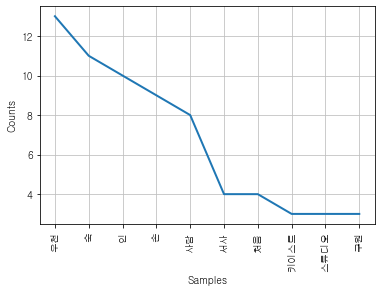

In [26]:
text_ob.plot(10)

##### 워드클라우드

In [7]:
from konlpy.corpus import kolaw
data= kolaw.open('constitution.txt').read()

In [8]:
from konlpy.tag import Komoran
komoran = Komoran()

In [9]:
print(komoran.nouns('%r' % data[0:1000]))

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁', '평화', '통일', '사명', '입각', '정의', '인도', '동포애', '민족', '단결', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '균등', '향상', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '우리들의', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '년', '7월 12일', '제정', '차', '개정', '헌법', '국회', '의결', '국민', '투표', '개정', '장', '강', '대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '바', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '도서', '대한민국', '통일', '지향', '자유', '민주', '기본', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전', '보장', '국토방위', '신성', '의무', '수행', '사명', '정치', '중립', '준수', '헌법', '체결', '공포', '조약', '일반', '승인', '국제', '법규', '국내법', '효력', '외국인', '국제법', '조약', '바', '지위', '보장', '공무원', '국민',

In [56]:
word_list = komoran.nouns('%r' % data[0:1000])
text = ' '.join(word_list)
text

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인류 공영 이바지 우리들의 자손 안전 자유 행복 확보 것 다짐 년 7월 12일 제정 차 개정 헌법 국회 의결 국민 투표 개정 장 강 대한민국 민주공화국 대한민국 주권 국민 권력 국민 대한민국 국민 요건 법률 국가 법률 바 재외국민 보호 의무 대한민국 영토 한반도 부속 도서 대한민국 통일 지향 자유 민주 기본 질서 입각 평화 통일 정책 수립 추진 대한민국 국제 평화 유지 노력 침략 전쟁 부인 국군 국가 안전 보장 국토방위 신성 의무 수행 사명 정치 중립 준수 헌법 체결 공포 조약 일반 승인 국제 법규 국내법 효력 외국인 국제법 조약 바 지위 보장 공무원 국민 전체 봉사자 국민 책임 공무원 신분 정치 중립 법률 바 보장 정당 설립 자유 복수 정당'

In [12]:
from wordcloud import WordCloud #wordcloud는 visual studio c++ runtime이 설치되어 있어야 한다

wordc = WordCloud()
wordc.generate(text)

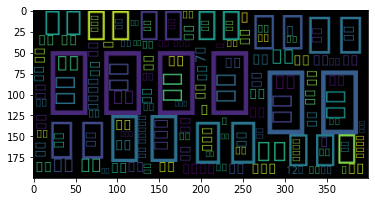

In [13]:
import matplotlib.pyplot as plt

plt.imshow(wordc)
plt.show()

In [15]:
wordc = WordCloud(background_color = 'white',max_words=20,
                 font_path=r'C:\Users\r2com\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Batang Light.ttf',
                 relative_scaling=0.2)
wordc.generate(text)

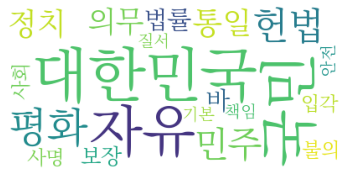

In [16]:
plt.imshow(wordc)
plt.axis('off')
plt.show()

In [17]:
word_list = komoran.nouns('%r'%data)

In [18]:
text = ' '.join(word_list)

In [21]:
wordcloud = WordCloud(background_color = 'white',max_words=2000,
                 font_path=r'C:\Users\r2com\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Batang Light.ttf',
                 relative_scaling=0.2)
wordcloud.generate(text)

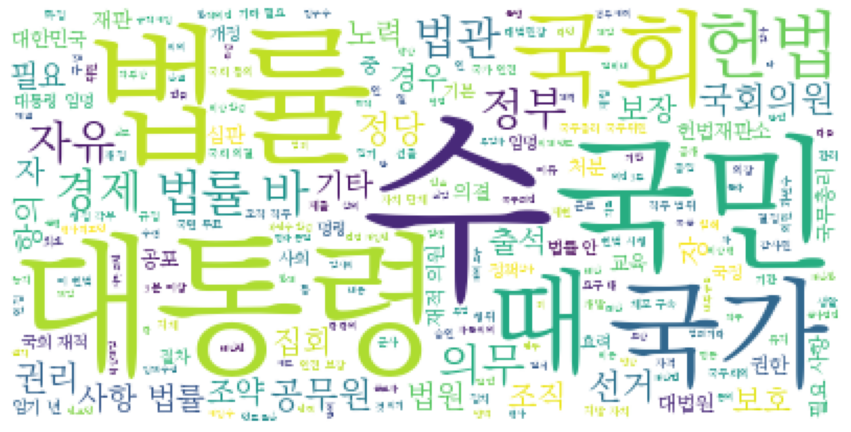

In [22]:
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [27]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
stop_w = STOPWORDS | ENGLISH_STOP_WORDS | {'대통령','국가'}

In [28]:
wordcloud = WordCloud(background_color = 'white',max_words=2000,
                 font_path=r'C:\Users\r2com\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Batang Light.ttf',
                 stopwords=stop_w,   
                 relative_scaling=0.2)
wordcloud.generate(text)

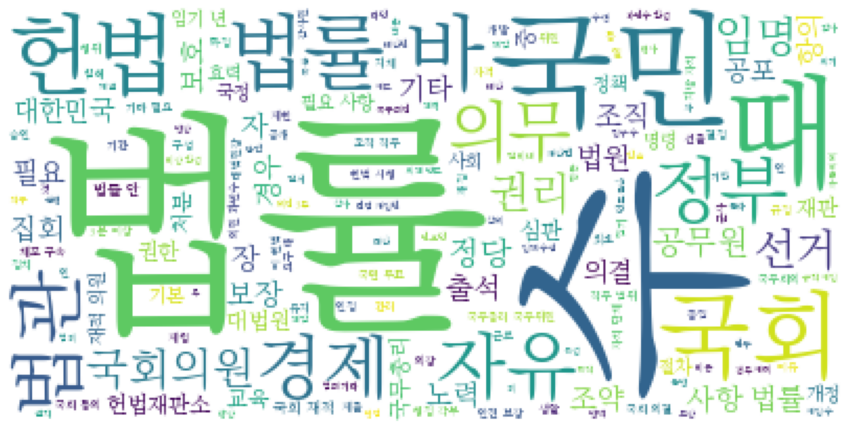

In [29]:
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [31]:
import numpy as np
from PIL import Image
img = Image.open('south_korea.png').convert('RGBA')
mask_ar = np.array(img)

In [32]:
wordcloud = WordCloud(background_color = 'white',max_words=2000,
                 font_path=r'C:\Users\r2com\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Batang Light.ttf',
                      mask=mask_ar, random_state=42)
wordcloud.generate(text)

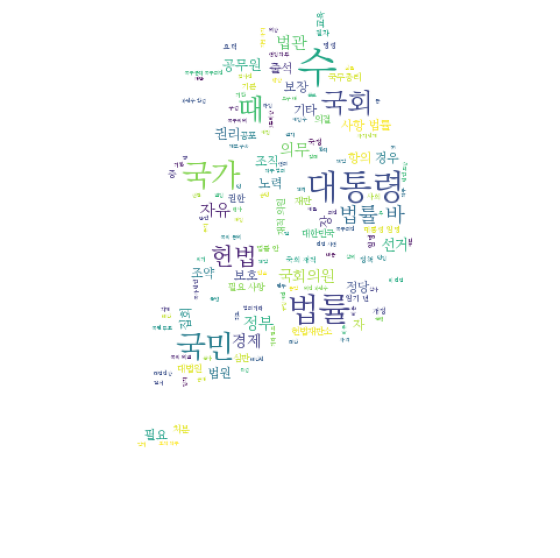

In [33]:
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [61]:
wordcloud = WordCloud(background_color = 'black',max_words=2000,
                 font_path=r'C:\Users\r2com\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Batang Light.ttf',
                     mask = mask_ar, random_state=42)
wordcloud.generate(text)
wordcloud.recolor(colormap='cubehelix_r')

In [62]:
import random
def grey_color(*args, **kwargs):
    lightness = random.randint(50,100)
    return f'hsl(40,100%,{lightness}%)'

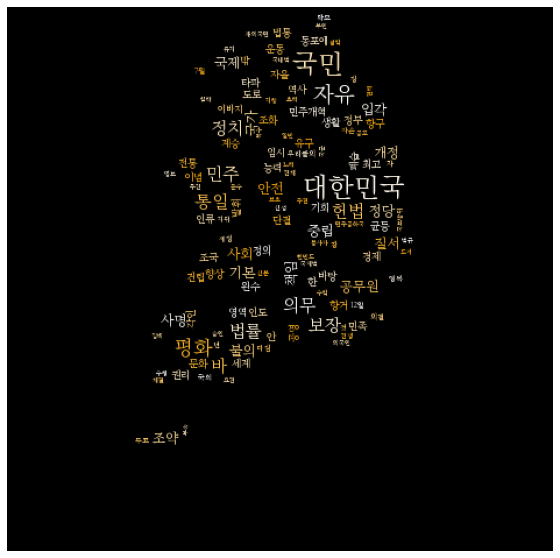

In [63]:
wordcloud.recolor(color_func=grey_color)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('result2.png')

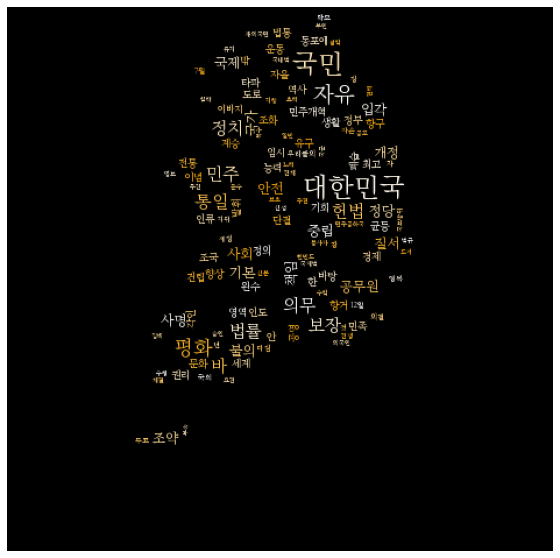

In [64]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

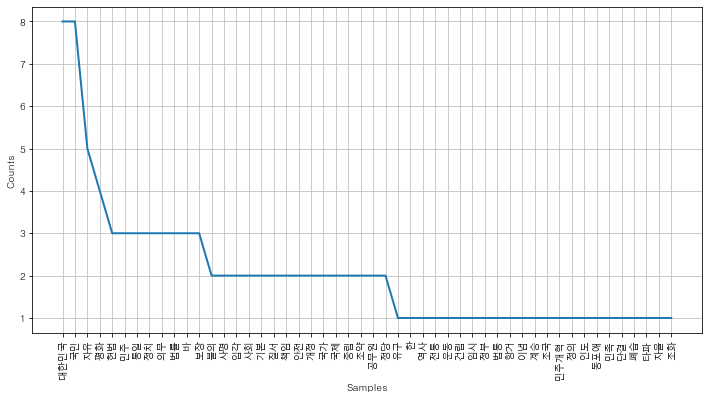

In [80]:
import nltk
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(12,6))
font_name = fm.FontProperties(fname='C:/Windows/Fonts/H2GTRM.TTF').get_name()

plt.rc('font', family = font_name)
nltk.Text(word_list).plot(50)

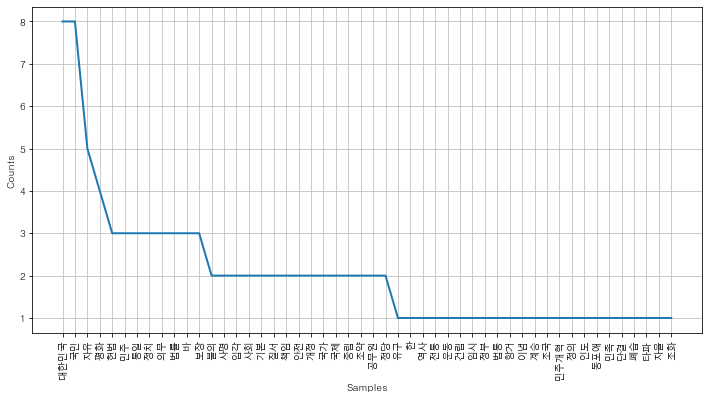

In [81]:
from matplotlib import pylab
plt.show = lambda: pylab.savefig('word_count.png')
plt.figure(figsize=(12,6))
font_name = fm.FontProperties(fname='C:/Windows/Fonts/H2GTRM.TTF').get_name()
plt.rc('font', family = font_name)
nltk.Text(word_list).plot(50)
plt.show()

##### 연습문제

In [89]:
import requests
rss_url = "https://www.yonhapnewstv.co.kr/category/news/politics/feed/"
yna_news = requests.get(rss_url)

In [90]:
from bs4 import BeautifulSoup
yna_news_soup = BeautifulSoup(yna_news.content,'xml')
link_list = yna_news_soup.select('item>link')

In [95]:
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list:
    news_url = link.text
    news_response = requests.get(news_url)
    news_soup = BeautifulSoup(news_response.content, "html.parser")
    news_content = news_soup.select_one('.cont-item01 > .detail')
    news_nouns = kkma.nouns(news_content.text)
    news_nouns_filter = filter(lambda word : len(word) > 1 ,news_nouns)
    news.append(list(news_nouns_filter))

In [101]:
from itertools import chain
text = ' '.join(list(chain(*news)))

In [102]:
import numpy as np
from PIL import Image
img = Image.open('south_korea.png').convert('RGBA')
mask_ar = np.array(img)
stop_w = {"연합뉴스", "연합", "기사문의", "문의", "앵커", "기자", "뉴스", "제보",
"닫기", "기사", "보도", "라인", "오늘", "시간"}

In [103]:
import wordcloud as wc
wordc = wc.WordCloud(font_path = 'C:/Windows/Fonts/H2GTRM.TTF',
                    stopwords=stop_w, max_words=1000, mask=mask_ar,
                    background_color='white')
wordc.generate(text)

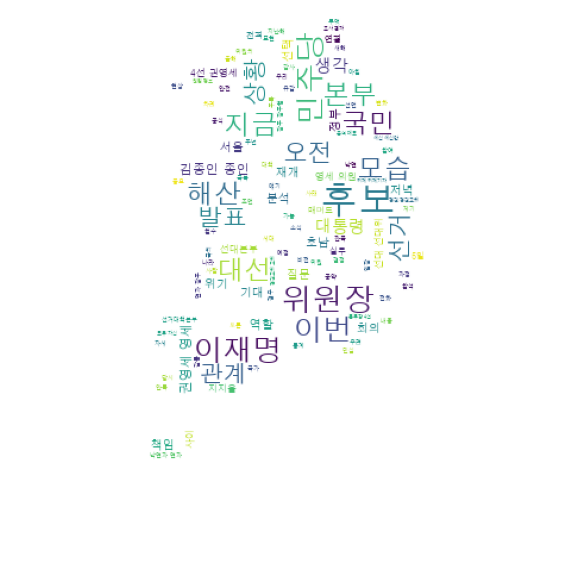

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.imshow(wordc)
plt.axis('off')
plt.show()

##### 라벨 인코딩 파이썬 코드로 만들기

In [35]:
word_dic = {'가':0, '나':1, '다':2}

In [36]:
text ='가 나 가 가 가 나 다 가 가 나 나'

In [37]:
word_list = text.split()

In [38]:
word_list

['가', '나', '가', '가', '가', '나', '다', '가', '가', '나', '나']

In [40]:
word_count = [0,0,0]
for word in word_list:
    word_count[word_dic[word]] += 1

In [41]:
word_count

[6, 4, 1]